In [1]:
import numpy as np
from matplotlib import pyplot as plt
from neural_net import neural_net # My neural net
from sklearn import datasets
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

### Get digits dataset and preprocess

In [11]:
digits = datasets.load_digits()
digits.data.shape[0]

(1797, 64)

In [14]:
num_test = 1797 // 6 # One-sixth the total training data seems appropriate for a cross-validation set.
X_test = np.matrix(digits.data[:num_test, :])
X_train = np.matrix(digits.data[num_test:, :])
z_test = list(digits.target[:num_test])
z_train = list(digits.target[num_test:])

A = np.eye(10)
y_test = np.matrix(list(map(lambda i: A[i], z_test))) # make one-hot vectors for targets
y_train = np.matrix(list(map(lambda i: A[i], z_train)))

### Some illustrations...

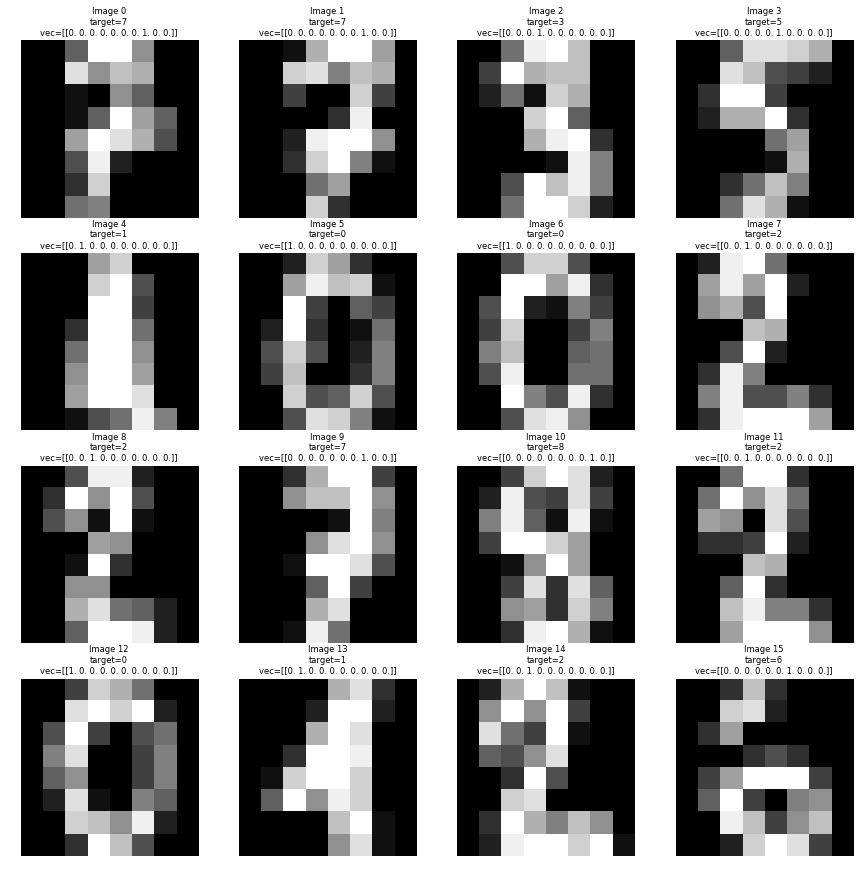

In [15]:
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    plt.title('Image {0}\ntarget={1}\nvec={2}'.format(i, z_train[i], y_train[i]), size='small')
    plt.imshow(X_train[i].reshape(8,8), cmap=plt.cm.gray)

### Initialize and train the neural net

In [16]:
N = neural_net(nodes_vector = [64, 15, 10])

In [18]:
def predict(data):
    outs = N.h(data)
    vec = np.matrix([[i] for i in range(10)])
    maxes = np.max(outs, 1)
    preds = np.floor(outs/maxes)
    z = preds * vec
    return np.array(z.flatten())[0]

In [20]:
# Train the net and track cost and accuracy on the test set
costs = []
accuracy = []
num_minutes = 5 # Train for this many minutes.
timeout = time.time() + 60*num_minutes
while time.time() < timeout:
    N.train(X_train, y_train)
    costs.append(N.cost(X_test, y_test))
    accuracy.append(np.sum(predict(X_test) == np.array(z_test)) / len(z_test))

The optimization here is non-stochastic gradient descent and the loss function is binary cross entropy, sooo....

Text(0,0.5,'acc')

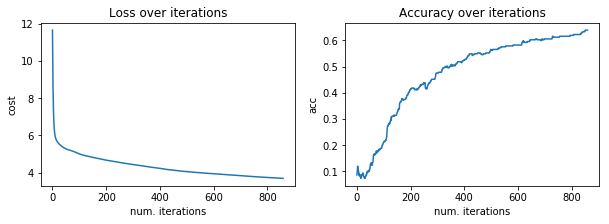

In [21]:
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(costs, '-')
plt.title('Loss over iterations')
plt.xlabel('num. iterations')
plt.ylabel('cost')
plt.subplot(1, 2, 2)
plt.plot(accuracy, '-')
plt.title('Accuracy over iterations')
plt.xlabel('num. iterations')
plt.ylabel('acc')

That's pretty terrible.  Let's see if keras can do better with the same architecture.

### Let's compare with keras

In [22]:
import keras as ks
from keras.models import Sequential # Keras model module
from keras.layers import Dense # Keras core layers
from keras.utils import np_utils # Utilities
from keras.optimizers import SGD, RMSprop, Nadam # Try a few randomly; optimizer choice is hard to say in general
from keras.datasets import mnist

Using TensorFlow backend.


### Preprocess data

In [23]:
num_test = 1797 // 6
#X_test = digits.data[:num_test, :].reshape(num_test, 1, 8, 8) # Do we need to do this??
#X_train = digits.data[num_test:, :].reshape(1797 - num_test, 1, 8, 8)
X_test = digits.data[:num_test, :] # Keep as rows.  Later, see about changing architecture and pros/cons of that.
X_train = digits.data[num_test:, :]
print(X_train.shape)

(1498, 64)


In [24]:
y_test = np_utils.to_categorical(digits.target[:num_test], 10)
y_train = np_utils.to_categorical(digits.target[num_test:], 10)
print(y_train.shape)

(1498, 10)


### Start building a network with the above architecture

'Dense' means fully-connected.  Each call to Dense adds another layer, but it's more mathematically correct to think of Dense as adding another weight matrix.

In [25]:
model = Sequential() # initialize

model.add(Dense(15,
                input_shape=(64,),
                kernel_initializer='RandomNormal',
                activation='sigmoid'))
model.add(Dense(10,
                kernel_initializer='RandomNormal',
                activation='sigmoid'))

opt = ks.optimizers.SGD(lr=0.1, decay=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [26]:
num_epochs = 2000
loss = []
acc = []
for i in range(num_epochs):
    model.fit(X_train, y_train, batch_size=32, epochs=1, verbose=False) # Train for one epoch
    ev = model.evaluate(X_test, y_test, verbose=False)
    loss.append(ev[0])
    acc.append(ev[1])
print('Final loss: {0}\nFinal accuracy: {1}'.format(loss[-1], acc[-1]))

Final loss: 0.12171280546032864
Final accuracy: 0.9598662265168385


Text(0,0.5,'acc')

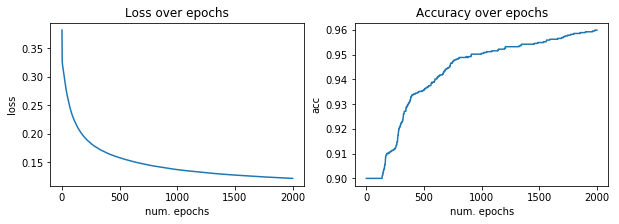

In [27]:
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(loss, '-')
plt.title('Loss over epochs')
plt.xlabel('num. epochs')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(acc, '-')
plt.title('Accuracy over epochs')
plt.xlabel('num. epochs')
plt.ylabel('acc')

Ha!

### Fiddling with architecture, etc.
Keep in mind, this is probably a poorly-chosen model for this problem.  We can achieve better results with a CNN, and even restricting our attention to vanilla NNs, we can add some layers or something...  For now, let's look at the same architecture, but play with the loss functions.

In [114]:
for opt in []
opt = ks.optimizers.
model2.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [116]:

model2.fit(X_train, y_train, batch_size=32, epochs=1000, verbose=True)

In [117]:
score2 = model2.evaluate(X_test, y_test, verbose=0) # The output depends on the model's choice of loss function.
print('Loss: {0}\nAccuracy: {1}'.format(score[0], score[1]))

Loss: 0.3339598569582936
Accuracy: 0.8999999761581421


Weird!